## Spliced Image Detection

*Importing a image for testing*

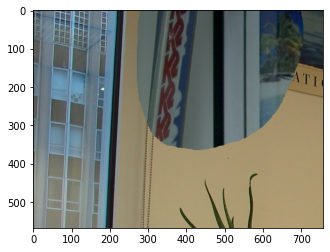

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as im
an_image = im.imread("/content/canong3_canonxt_sub_01.tif")
plt.imshow(an_image)

Preprocessing: Converting to GrayScale

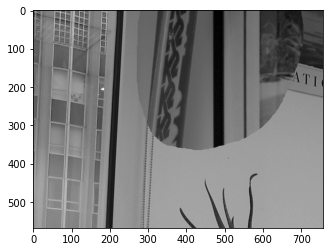

In [ ]:
import numpy as np
rgb_weights = [0.2989, 0.5870, 0.1140]

grayscale_image = np.dot(an_image[...,:3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))

Image Transformation To Wavelet

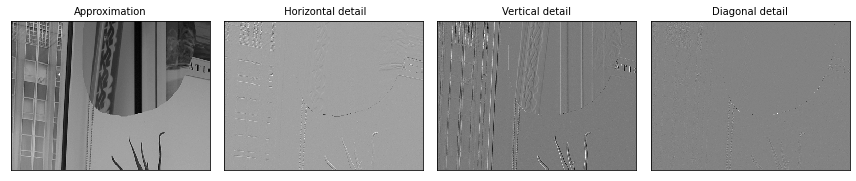

In [ ]:
import pywt
import pywt.data


# Load image
original = grayscale_image

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [ ]:
print(original.shape)
print(LL.shape)
print(LH.shape)
# Level 1 Decomposition
# LL Aprroximation
# LH Horizontal 
# HL Vertical
# HH Diagonal

(568, 757)
(286, 381)
(286, 381)


Noise Statistics Estimation

In [ ]:
# the steps are:

#   # Wavelet transformed diagonal component 
    # has been taken from all four components.
#   # This diagonal component is got from high pass filter of columns 
    # and then high pass filter of row. 
    # Then, this diag-onal component is divided into distinct blocks 
    # of block size 2 × 2. Here, distinct means non-overlapping blocks. 
    # If the size of the image is m × n , then the number of distinct blocks will be 
    # (m/2 × n/2).
#   # Higher-order measure (using noise estimation given in the above section) 
    # calculation of each distinct block. The higher measure is defined 
    # as the fourth-order central moment (𝜇4 ) of 2 × 2 distinct block of
    # the image. These values are stored in an array.
#   # Quartile statistics of the measured samples have been calculated. 
    # To calculate quartile values, first measured sample array is sorted
    # and then calculated first (Q1), second (Q2 ) and third (Q3) quartile 
    # values of the sorted array.
#   # Resultant samples values are converted into binary values using the
    # threshold (th) value chosen from quartile value

In [ ]:
import cv2 
import numpy as np 
   
      
# Read the image 
img = cv2.imread('/content/canong3_canonxt_sub_01.tif', 0) 
img = HH  
# Obtain number of rows and columns  
# of the image 
m, n = img.shape 
   
# Develop Averaging filter(3, 3) mask 
mask = np.ones([3, 3], dtype = int) 
mask = mask / 9
   
# Convolve the 3X3 mask over the image  
img_new = np.zeros([m, n]) 
  
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
         
        img_new[i, j]= temp 
          
img_new = img_new.astype(np.uint8) 
cv2.imwrite('blurred.tif', img_new) 

True

In [ ]:
img_new[5]

array([  0,   0, 255,   0, 255,   0,   0,   1,   1,   1,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 255,   0, 254, 255, 255,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
         0,   0,   0,   0,   0, 255,   0,   0,   0,   0, 255, 255, 254,
       254,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 254,
       255, 255,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   